In [1]:
import numpy as np 
import pandas as pd 
import xgboost
import csv as csv
import seaborn as sns
from matplotlib import pyplot

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score

import matplotlib.pyplot as plt


pd.options.mode.chained_assignment = None

In [2]:
data=pd.read_csv("__train__.csv")

In [3]:
data.isnull().sum()

Field           0
Year            0
Cluster         0
Area            0
Yield           0
               ..
35_week_ndvi    0
36_week_ndvi    0
37_week_ndvi    0
38_week_ndvi    0
39_week_ndvi    0
Length: 162, dtype: int64

In [4]:
data.head()

,Field,Year,Cluster,Area,Yield,Geozone,Predecessor,FAO,N_kg/ga,P_kg/ga,...,30_week_ndvi,31_week_ndvi,32_week_ndvi,33_week_ndvi,34_week_ndvi,35_week_ndvi,36_week_ndvi,37_week_ndvi,38_week_ndvi,39_week_ndvi
0,1310,2019,1,79.263,129.077355,12,0,320.0,222.330633,52.239128,...,0.757000,0.760333,0.69800,0.6610,0.60100,0.538000,0.4710,0.402333,0.347375,0.343
1,1315,2018,1,115.484,190.068235,12,0,360.0,202.932162,34.790209,...,0.734968,0.734000,0.73625,0.7140,0.68300,0.624429,0.5905,0.511000,0.463333,0.410
2,1315,2019,1,83.883,149.674818,12,0,320.0,229.686158,66.645135,...,0.693000,0.664300,0.66600,0.6230,0.57800,0.508000,0.4380,0.366667,0.333125,0.325
3,1312,2018,1,55.964,181.336145,12,0,360.0,209.345544,49.952827,...,0.751783,0.737000,0.73500,0.7095,0.68075,0.646286,0.6115,0.540000,0.476000,0.405
4,1312,2019,1,55.965,148.165017,12,0,320.0,204.983972,51.916963,...,0.735000,0.715300,0.67900,0.6650,0.63000,0.569000,0.5010,0.460714,0.399500,0.387


In [5]:

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [6]:
data.isnull().sum()

Field                                    0
Year                                     0
Cluster                                  0
Area                                     0
Yield                                    0
Geozone                                  0
Predecessor                              0
FAO                                    790
N_kg/ga                                  0
P_kg/ga                                227
K_kg/ga                                335
5_YEARLY_median_AVERAGE_TEMPERATURE      0
6_YEARLY_median_AVERAGE_TEMPERATURE      0
7_YEARLY_median_AVERAGE_TEMPERATURE      0
8_YEARLY_median_AVERAGE_TEMPERATURE      0
9_YEARLY_median_AVERAGE_TEMPERATURE      0
5_YEARLY_median_EVAPORATION              0
6_YEARLY_median_EVAPORATION              0
7_YEARLY_median_EVAPORATION              0
8_YEARLY_median_EVAPORATION              0
9_YEARLY_median_EVAPORATION              0
5_YEARLY_median_HUMIDITY(%)              0
6_YEARLY_median_HUMIDITY(%)              0
7_YEARLY_me

In [7]:
def get_name_empty_col(_data_):
    list_column=(list(_data_.columns))
    list_empty=[]
    for i in list_column:
        if _data_[i].isnull().sum()!=0:
            list_empty.append([i,_data_[i].isnull().sum()])
    return list_empty

In [8]:
data.shape

(5734, 162)

In [9]:
def input_empty(_data_,i):
    df = pd.DataFrame()
    df = _data_[_data_["Cluster"]==i]
    df["FAO"].fillna(df["FAO"].median(skipna=True),inplace=True)
    df["P_kg/ga"].fillna(df["P_kg/ga"].median(skipna=True),inplace=True)
    df["K_kg/ga"].fillna(df["K_kg/ga"].median(skipna=True),inplace=True)
    if i ==2:
        pass
    else:
        df["Criteria"]=df["Area"]/df["Yield"]
        df=df.drop([df['Criteria'].idxmax(),df['Criteria'].idxmin()])
        df= df.drop(columns=['Criteria'])
    return df



In [10]:
data_finally=pd.DataFrame()
for k in range(7):
    time_data= input_empty(data,k)
    data_finally= data_finally.append(time_data)

In [11]:
data_finally.isnull().sum()

Field                                  0
Year                                   0
Cluster                                0
Area                                   0
Yield                                  0
Geozone                                0
Predecessor                            0
FAO                                    0
N_kg/ga                                0
P_kg/ga                                0
K_kg/ga                                0
5_YEARLY_median_AVERAGE_TEMPERATURE    0
6_YEARLY_median_AVERAGE_TEMPERATURE    0
7_YEARLY_median_AVERAGE_TEMPERATURE    0
8_YEARLY_median_AVERAGE_TEMPERATURE    0
9_YEARLY_median_AVERAGE_TEMPERATURE    0
5_YEARLY_median_EVAPORATION            0
6_YEARLY_median_EVAPORATION            0
7_YEARLY_median_EVAPORATION            0
8_YEARLY_median_EVAPORATION            0
9_YEARLY_median_EVAPORATION            0
5_YEARLY_median_HUMIDITY(%)            0
6_YEARLY_median_HUMIDITY(%)            0
7_YEARLY_median_HUMIDITY(%)            0
8_YEARLY_median_

In [12]:
data_finally.shape

(5722, 162)

In [13]:
data_finally.describe()

,Field,Year,Cluster,Area,Yield,Geozone,Predecessor,FAO,N_kg/ga,P_kg/ga,K_kg/ga,5_YEARLY_median_AVERAGE_TEMPERATURE,6_YEARLY_median_AVERAGE_TEMPERATURE,7_YEARLY_median_AVERAGE_TEMPERATURE,8_YEARLY_median_AVERAGE_TEMPERATURE,9_YEARLY_median_AVERAGE_TEMPERATURE,5_YEARLY_median_EVAPORATION,6_YEARLY_median_EVAPORATION,7_YEARLY_median_EVAPORATION,8_YEARLY_median_EVAPORATION,9_YEARLY_median_EVAPORATION,5_YEARLY_median_HUMIDITY(%),6_YEARLY_median_HUMIDITY(%),7_YEARLY_median_HUMIDITY(%),8_YEARLY_median_HUMIDITY(%),9_YEARLY_median_HUMIDITY(%),5_YEARLY_sum_CALCULATED_RADIATION,6_YEARLY_sum_CALCULATED_RADIATION,7_YEARLY_sum_CALCULATED_RADIATION,8_YEARLY_sum_CALCULATED_RADIATION,9_YEARLY_sum_CALCULATED_RADIATION,5_YEARLY_sum_RAINFALL,6_YEARLY_sum_RAINFALL,7_YEARLY_sum_RAINFALL,8_YEARLY_sum_RAINFALL,9_YEARLY_sum_RAINFALL,22_WEEK_AVERAGE_TEMPERATURE,23_WEEK_AVERAGE_TEMPERATURE,24_WEEK_AVERAGE_TEMPERATURE,25_WEEK_AVERAGE_TEMPERATURE,26_WEEK_AVERAGE_TEMPERATURE,27_WEEK_AVERAGE_TEMPERATURE,28_WEEK_AVERAGE_TEMPERATURE,29_WEEK_AVERAGE_TEMPERATURE,30_WEEK_AVERAGE_TEMPERATURE,31_WEEK_AVERAGE_TEMPERATURE,32_WEEK_AVERAGE_TEMPERATURE,33_WEEK_AVERAGE_TEMPERATURE,34_WEEK_AVERAGE_TEMPERATURE,35_WEEK_AVERAGE_TEMPERATURE,36_WEEK_AVERAGE_TEMPERATURE,37_WEEK_AVERAGE_TEMPERATURE,38_WEEK_AVERAGE_TEMPERATURE,39_WEEK_AVERAGE_TEMPERATURE,22_WEEK_CALCULATED_RADIATION,23_WEEK_CALCULATED_RADIATION,24_WEEK_CALCULATED_RADIATION,25_WEEK_CALCULATED_RADIATION,26_WEEK_CALCULATED_RADIATION,27_WEEK_CALCULATED_RADIATION,28_WEEK_CALCULATED_RADIATION,29_WEEK_CALCULATED_RADIATION,30_WEEK_CALCULATED_RADIATION,31_WEEK_CALCULATED_RADIATION,32_WEEK_CALCULATED_RADIATION,33_WEEK_CALCULATED_RADIATION,34_WEEK_CALCULATED_RADIATION,35_WEEK_CALCULATED_RADIATION,36_WEEK_CALCULATED_RADIATION,37_WEEK_CALCULATED_RADIATION,38_WEEK_CALCULATED_RADIATION,39_WEEK_CALCULATED_RADIATION,22_WEEK_EVAPORATION,23_WEEK_EVAPORATION,24_WEEK_EVAPORATION,25_WEEK_EVAPORATION,26_WEEK_EVAPORATION,27_WEEK_EVAPORATION,28_WEEK_EVAPORATION,29_WEEK_EVAPORATION,30_WEEK_EVAPORATION,31_WEEK_EVAPORATION,32_WEEK_EVAPORATION,33_WEEK_EVAPORATION,34_WEEK_EVAPORATION,35_WEEK_EVAPORATION,36_WEEK_EVAPORATION,37_WEEK_EVAPORATION,38_WEEK_EVAPORATION,39_WEEK_EVAPORATION,22_WEEK_HUMIDITY(%),23_WEEK_HUMIDITY(%),24_WEEK_HUMIDITY(%),25_WEEK_HUMIDITY(%),26_WEEK_HUMIDITY(%),27_WEEK_HUMIDITY(%),28_WEEK_HUMIDITY(%),29_WEEK_HUMIDITY(%),30_WEEK_HUMIDITY(%),31_WEEK_HUMIDITY(%),32_WEEK_HUMIDITY(%),33_WEEK_HUMIDITY(%),34_WEEK_HUMIDITY(%),35_WEEK_HUMIDITY(%),36_WEEK_HUMIDITY(%),37_WEEK_HUMIDITY(%),38_WEEK_HUMIDITY(%),39_WEEK_HUMIDITY(%),22_WEEK_RAINFALL,23_WEEK_RAINFALL,24_WEEK_RAINFALL,25_WEEK_RAINFALL,26_WEEK_RAINFALL,27_WEEK_RAINFALL,28_WEEK_RAINFALL,29_WEEK_RAINFALL,30_WEEK_RAINFALL,31_WEEK_RAINFALL,32_WEEK_RAINFALL,33_WEEK_RAINFALL,34_WEEK_RAINFALL,35_WEEK_RAINFALL,36_WEEK_RAINFALL,37_WEEK_RAINFALL,38_WEEK_RAINFALL,39_WEEK_RAINFALL,22_WEEK_SUM_ACTIVE_TEMPERATURE,23_WEEK_SUM_ACTIVE_TEMPERATURE,24_WEEK_SUM_ACTIVE_TEMPERATURE,25_WEEK_SUM_ACTIVE_TEMPERATURE,26_WEEK_SUM_ACTIVE_TEMPERATURE,27_WEEK_SUM_ACTIVE_TEMPERATURE,28_WEEK_SUM_ACTIVE_TEMPERATURE,29_WEEK_SUM_ACTIVE_TEMPERATURE,30_WEEK_SUM_ACTIVE_TEMPERATURE,31_WEEK_SUM_ACTIVE_TEMPERATURE,32_WEEK_SUM_ACTIVE_TEMPERATURE,33_WEEK_SUM_ACTIVE_TEMPERATURE,34_WEEK_SUM_ACTIVE_TEMPERATURE,35_WEEK_SUM_ACTIVE_TEMPERATURE,36_WEEK_SUM_ACTIVE_TEMPERATURE,37_WEEK_SUM_ACTIVE_TEMPERATURE,38_WEEK_SUM_ACTIVE_TEMPERATURE,39_WEEK_SUM_ACTIVE_TEMPERATURE,22_week_ndvi,23_week_ndvi,24_week_ndvi,25_week_ndvi,26_week_ndvi,27_week_ndvi,28_week_ndvi,29_week_ndvi,30_week_ndvi,31_week_ndvi,32_week_ndvi,33_week_ndvi,34_week_ndvi,35_week_ndvi,36_week_ndvi,37_week_ndvi,38_week_ndvi,39_week_ndvi
count,5722.000000,5722.000000,5722.000000,5722.000000,5722.000000,5722.000000,5722.000000,5722.000000,5722.000000,5722.000000,5722.000000,5722.000000,5722.000000,5722.000000,5722.000000,5722.000000,5722.000000,5722.000000,5722.000000,5722.000000,5722.000000,5722.000000,5722.000000,5722.000000,5722.000000,5722.000000,5.722000e+03,5.7220

In [14]:
data_finally.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5722 entries, 1930 to 5733
Data columns (total 162 columns):
 #    Column                               Non-Null Count  Dtype  
---   ------                               --------------  -----  
 0    Field                                5722 non-null   int64  
 1    Year                                 5722 non-null   int64  
 2    Cluster                              5722 non-null   int64  
 3    Area                                 5722 non-null   float64
 4    Yield                                5722 non-null   float64
 5    Geozone                              5722 non-null   int64  
 6    Predecessor                          5722 non-null   int64  
 7    FAO                                  5722 non-null   float64
 8    N_kg/ga                              5722 non-null   float64
 9    P_kg/ga                              5722 non-null   float64
 10   K_kg/ga                              5722 non-null   float64
 11   5_YEARLY_med

In [15]:
def del_duplicate(_data_):
    _data_ = _data_.round({"Area": 3,"Yield": 3})
    _data_["Field"] = _data_["Field"].astype(str)
    _data_["Year"]=_data_["Year"].astype(str)
    _data_["Cluster"] = _data_["Cluster"].astype(str)
    _data_["Area"] = _data_["Area"].astype(str)
    _data_["Yield"]=_data_["Yield"].astype(str)
    _data_["ColSor"]=_data_[["Field","Year","Cluster","Area","Yield"]].sum(1)
    _data_.drop_duplicates(subset=['ColSor'])
    _data_=_data_.drop(columns=['ColSor'])
    _data_["Field"] = _data_["Field"].astype(float)
    _data_["Year"]=_data_["Year"].astype(float)
    _data_["Cluster"] = _data_["Cluster"].astype(float)
    _data_["Area"] = _data_["Area"].astype(float)
    _data_["Yield"]=_data_["Yield"].astype(float)
    
    return _data_

In [16]:
data_finally=del_duplicate(data_finally)
data_finally.shape

(5722, 162)

In [17]:
def scatter_year_cluster(i,k):
    de=data_finally[data_finally["Year"]==i]
    sns.scatterplot(data=de[de["Cluster"]==k] ,x="Area",y="Yield")
    
def scatter_year(i):
    de=data_finally[data_finally["Year"]==i]
    sns.scatterplot(data=de ,x="Area",y="Yield",hue="Cluster")
def scatter_cluster(i):
    de=data_finally[data_finally["Cluster"]==i]
    sns.scatterplot(data=de ,x="Area",y="Yield")

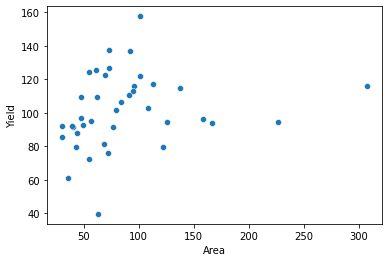

In [18]:
scatter_year_cluster(2016,1)

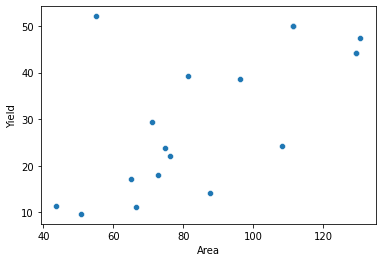

In [19]:
scatter_year_cluster(2017,5)

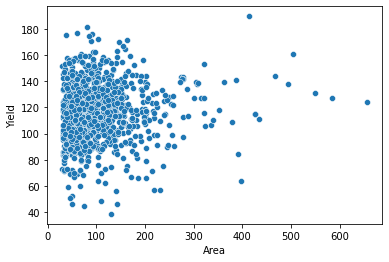

In [20]:
scatter_year_cluster(2019,0)

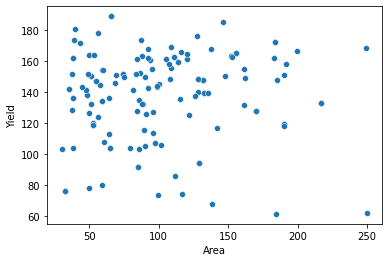

In [21]:
scatter_year_cluster(2018,4)

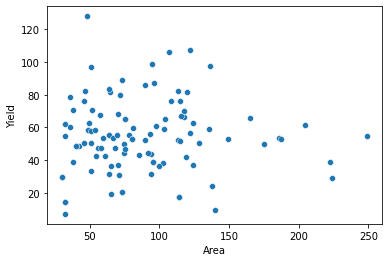

In [22]:
scatter_year_cluster(2017,3)

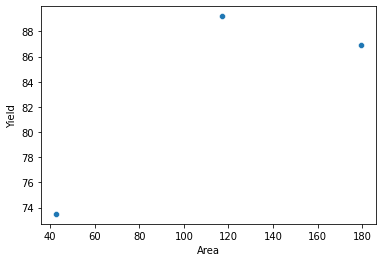

In [23]:
scatter_year_cluster(2019,2)

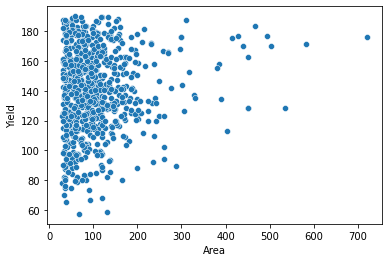

In [24]:
scatter_year_cluster(2018,0)

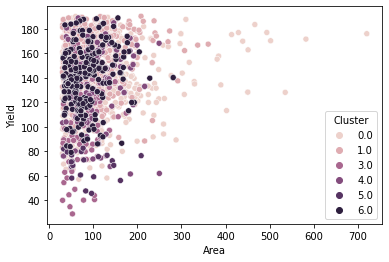

In [25]:
scatter_year(2018)

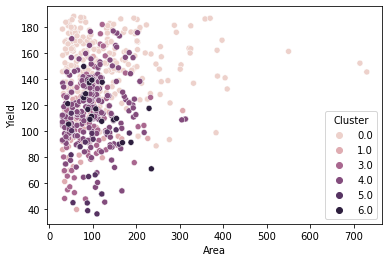

In [26]:
scatter_year(2016)

<AxesSubplot:xlabel='Cluster', ylabel='Yield'>

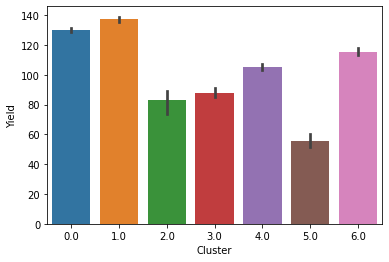

In [27]:
sns.barplot(x="Cluster", y="Yield", data=data_finally)

<AxesSubplot:xlabel='Year', ylabel='Yield'>

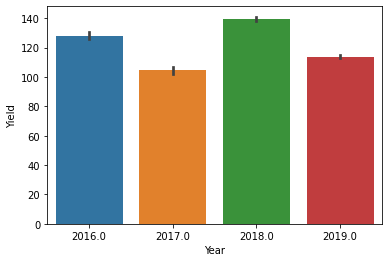

In [28]:
sns.barplot(x="Year", y="Yield",data=data_finally)

<AxesSubplot:xlabel='Area', ylabel='Yield'>

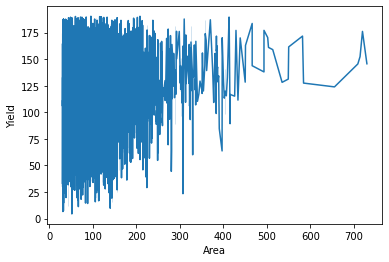

In [29]:
sns.lineplot(x="Area",y="Yield",data=data_finally)

<AxesSubplot:xlabel='Cluster', ylabel='Area'>

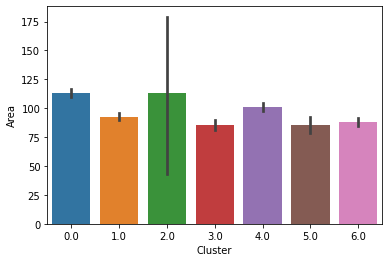

In [30]:
sns.barplot(x="Cluster",y="Area",data=data_finally)

<AxesSubplot:xlabel='Geozone', ylabel='Cluster'>

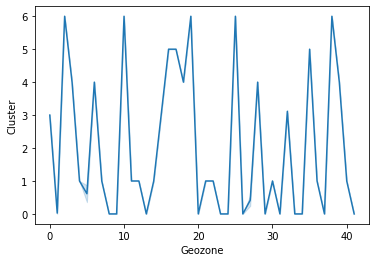

In [31]:
sns.lineplot(x="Geozone",y="Cluster",data=data_finally)

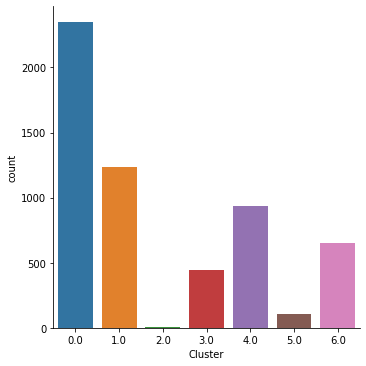

In [32]:
sns.catplot(x="Cluster", kind="count", data=data_finally)

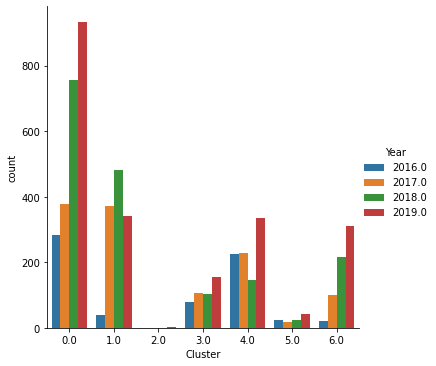

In [33]:
sns.catplot(x="Cluster", kind="count", data=data_finally ,hue="Year")

<AxesSubplot:xlabel='Cluster', ylabel='Yield'>

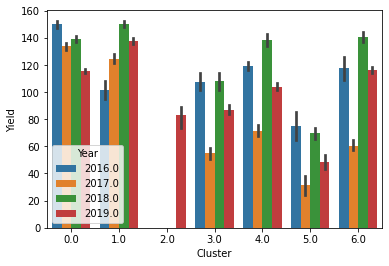

In [34]:
sns.barplot(x="Cluster", y= "Yield",hue="Year",data=data_finally)

In [35]:
def create_grafic(numCluster,_data_):    
    rslt_df = _data_[_data_['Cluster']== numCluster]
    sns.catplot(x="Area", y="Yield",data=rslt_df)

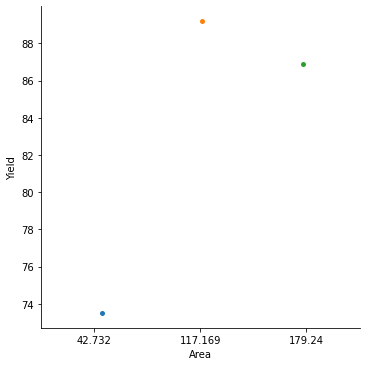

In [36]:
create_grafic(2,data_finally)

In [37]:
data_test_=pd.read_csv("__test__.csv")

<AxesSubplot:xlabel='Cluster', ylabel='Area'>

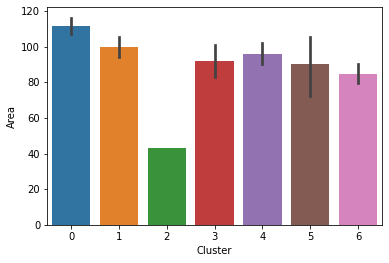

In [38]:
sns.barplot(x="Cluster",y="Area",data=data_test_)

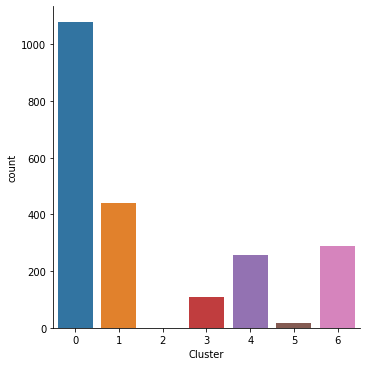

In [39]:
sns.catplot(x="Cluster", kind="count", data=data_test_)

<AxesSubplot:xlabel='Geozone', ylabel='Cluster'>

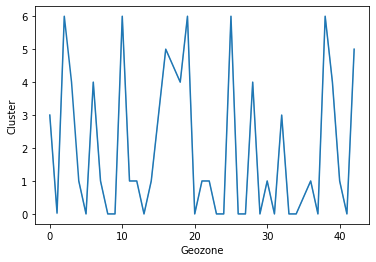

In [40]:
sns.lineplot(x="Geozone",y="Cluster",data=data_test_)

In [41]:
data_test_.shape

(2192, 162)

In [42]:
_test_f=pd.DataFrame()
for k in range(7):
    time_data= input_empty(data_test_,k)
    _test_f= _test_f.append(time_data)

In [43]:
_test_f=del_duplicate(_test_f)

In [44]:
get_name_empty_col(_test_f)

[]

In [45]:
_test_f.head()

,Field,Year,Cluster,Area,Yield,Geozone,Predecessor,FAO,N_kg/ga,P_kg/ga,K_kg/ga,5_YEARLY_median_AVERAGE_TEMPERATURE,6_YEARLY_median_AVERAGE_TEMPERATURE,7_YEARLY_median_AVERAGE_TEMPERATURE,8_YEARLY_median_AVERAGE_TEMPERATURE,9_YEARLY_median_AVERAGE_TEMPERATURE,5_YEARLY_median_EVAPORATION,6_YEARLY_median_EVAPORATION,7_YEARLY_median_EVAPORATION,8_YEARLY_median_EVAPORATION,9_YEARLY_median_EVAPORATION,5_YEARLY_median_HUMIDITY(%),6_YEARLY_median_HUMIDITY(%),7_YEARLY_median_HUMIDITY(%),8_YEARLY_median_HUMIDITY(%),9_YEARLY_median_HUMIDITY(%),5_YEARLY_sum_CALCULATED_RADIATION,6_YEARLY_sum_CALCULATED_RADIATION,7_YEARLY_sum_CALCULATED_RADIATION,8_YEARLY_sum_CALCULATED_RADIATION,9_YEARLY_sum_CALCULATED_RADIATION,5_YEARLY_sum_RAINFALL,6_YEARLY_sum_RAINFALL,7_YEARLY_sum_RAINFALL,8_YEARLY_sum_RAINFALL,9_YEARLY_sum_RAINFALL,22_WEEK_AVERAGE_TEMPERATURE,23_WEEK_AVERAGE_TEMPERATURE,24_WEEK_AVERAGE_TEMPERATURE,25_WEEK_AVERAGE_TEMPERATURE,26_WEEK_AVERAGE_TEMPERATURE,27_WEEK_AVERAGE_TEMPERATURE,28_WEEK_AVERAGE_TEMPERATURE,29_WEEK_AVERAGE_TEMPERATURE,30_WEEK_AVERAGE_TEMPERATURE,31_WEEK_AVERAGE_TEMPERATURE,32_WEEK_AVERAGE_TEMPERATURE,33_WEEK_AVERAGE_TEMPERATURE,34_WEEK_AVERAGE_TEMPERATURE,35_WEEK_AVERAGE_TEMPERATURE,36_WEEK_AVERAGE_TEMPERATURE,37_WEEK_AVERAGE_TEMPERATURE,38_WEEK_AVERAGE_TEMPERATURE,39_WEEK_AVERAGE_TEMPERATURE,22_WEEK_CALCULATED_RADIATION,23_WEEK_CALCULATED_RADIATION,24_WEEK_CALCULATED_RADIATION,25_WEEK_CALCULATED_RADIATION,26_WEEK_CALCULATED_RADIATION,27_WEEK_CALCULATED_RADIATION,28_WEEK_CALCULATED_RADIATION,29_WEEK_CALCULATED_RADIATION,30_WEEK_CALCULATED_RADIATION,31_WEEK_CALCULATED_RADIATION,32_WEEK_CALCULATED_RADIATION,33_WEEK_CALCULATED_RADIATION,34_WEEK_CALCULATED_RADIATION,35_WEEK_CALCULATED_RADIATION,36_WEEK_CALCULATED_RADIATION,37_WEEK_CALCULATED_RADIATION,38_WEEK_CALCULATED_RADIATION,39_WEEK_CALCULATED_RADIATION,22_WEEK_EVAPORATION,23_WEEK_EVAPORATION,24_WEEK_EVAPORATION,25_WEEK_EVAPORATION,26_WEEK_EVAPORATION,27_WEEK_EVAPORATION,28_WEEK_EVAPORATION,29_WEEK_EVAPORATION,30_WEEK_EVAPORATION,31_WEEK_EVAPORATION,32_WEEK_EVAPORATION,33_WEEK_EVAPORATION,34_WEEK_EVAPORATION,35_WEEK_EVAPORATION,36_WEEK_EVAPORATION,37_WEEK_EVAPORATION,38_WEEK_EVAPORATION,39_WEEK_EVAPORATION,22_WEEK_HUMIDITY(%),23_WEEK_HUMIDITY(%),24_WEEK_HUMIDITY(%),25_WEEK_HUMIDITY(%),26_WEEK_HUMIDITY(%),27_WEEK_HUMIDITY(%),28_WEEK_HUMIDITY(%),29_WEEK_HUMIDITY(%),30_WEEK_HUMIDITY(%),31_WEEK_HUMIDITY(%),32_WEEK_HUMIDITY(%),33_WEEK_HUMIDITY(%),34_WEEK_HUMIDITY(%),35_WEEK_HUMIDITY(%),36_WEEK_HUMIDITY(%),37_WEEK_HUMIDITY(%),38_WEEK_HUMIDITY(%),39_WEEK_HUMIDITY(%),22_WEEK_RAINFALL,23_WEEK_RAINFALL,24_WEEK_RAINFALL,25_WEEK_RAINFALL,26_WEEK_RAINFALL,27_WEEK_RAINFALL,28_WEEK_RAINFALL,29_WEEK_RAINFALL,30_WEEK_RAINFALL,31_WEEK_RAINFALL,32_WEEK_RAINFALL,33_WEEK_RAINFALL,34_WEEK_RAINFALL,35_WEEK_RAINFALL,36_WEEK_RAINFALL,37_WEEK_RAINFALL,38_WEEK_RAINFALL,39_WEEK_RAINFALL,22_WEEK_SUM_ACTIVE_TEMPERATURE,23_WEEK_SUM_ACTIVE_TEMPERATURE,24_WEEK_SUM_ACTIVE_TEMPERATURE,25_WEEK_SUM_ACTIVE_TEMPERATURE,26_WEEK_SUM_ACTIVE_TEMPERATURE,27_WEEK_SUM_ACTIVE_TEMPERATURE,28_WEEK_SUM_ACTIVE_TEMPERATURE,29_WEEK_SUM_ACTIVE_TEMPERATURE,30_WEEK_SUM_ACTIVE_TEMPERATURE,31_WEEK_SUM_ACTIVE_TEMPERATURE,32_WEEK_SUM_ACTIVE_TEMPERATURE,33_WEEK_SUM_ACTIVE_TEMPERATURE,34_WEEK_SUM_ACTIVE_TEMPERATURE,35_WEEK_SUM_ACTIVE_TEMPERATURE,36_WEEK_SUM_ACTIVE_TEMPERATURE,37_WEEK_SUM_ACTIVE_TEMPERATURE,38_WEEK_SUM_ACTIVE_TEMPERATURE,39_WEEK_SUM_ACTIVE_TEMPERATURE,22_week_ndvi,23_week_ndvi,24_week_ndvi,25_week_ndvi,26_week_ndvi,27_week_ndvi,28_week_ndvi,29_week_ndvi,30_week_ndvi,31_week_ndvi,32_week_ndvi,33_week_ndvi,34_week_ndvi,35_week_ndvi,36_week_ndvi,37_week_ndvi,38_week_ndvi,39_week_ndvi
638,3427.0,2020.0,0.0,105.861,0.0,27,0,360.0,195.297806,52.084375,88.588149,15.899978,19.677139,21.376676,20.612238,15.172047,3.49,4.05,3.97,3.3,1.93,62.0,62.0,65.0,62.0,69.0,10215501.0,10462098.0,10456654.0,9191305.0,6167239.0,864.92,766.3,724.12,472.64,460.36,13.58,14.49,24.56,22.66,22.1,24.13,22.55,19.17,21.21,23.19,23.14,18.58,22.5

In [46]:


data_finally.drop(data_finally.columns[[120,56,143,111,67,100,79,57,70,46,49,127,95,106,48,
21,54,94,97,63,16,123,15,101,84,109,12,66,19,
126]],axis=1,inplace=True)



_test_f.drop(_test_f.columns[[120,56,143,111,67,100,79,57,70,46,49,127,95,106,48,
21,54,94,97,63,16,123,15,101,84,109,12,66,19,
126]],axis=1,inplace=True)





In [47]:


y_train = data_finally.loc[:,"Yield"]

df=data_finally.copy()
df.drop("Yield",axis=1,inplace=True)
X_train = df
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


y_test = _test_f.loc[:,"Yield"]

dftest=_test_f.copy()
dftest.drop("Yield",axis=1,inplace=True)
X_test = dftest


In [48]:
print("test: ",X_test.shape,y_test.shape)
print("train: ",X_train.shape,y_train.shape)

test:  (2186, 131) (2186,)
train:  (5722, 131) (5722,)


In [49]:
categorical_features=list(X_train.columns)

In [50]:
best_xgb_model = xgboost.XGBRegressor(eta=0.05,
                 gamma=0.6,                 
                 learning_rate=0.07,
                 max_depth=7,
                 min_child_weight=5,
                 n_estimators=1000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.8)
best_xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.05, gamma=0.6,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.07, max_delta_step=0, max_depth=7,
             min_child_weight=5, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0.75, reg_lambda=0.45, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [51]:

predictions = best_xgb_model.predict(X_test)
#print(r2_score(predictions,y_test))

                                  feature  importance
84                                  Area        3223
23                               N_kg/ga        2642
15                               P_kg/ga        2421
48                               K_kg/ga        2372
11                          22_week_ndvi        2338
16                          25_week_ndvi        2029
50                                 Field        1969
29                          23_week_ndvi        1962
14                          26_week_ndvi        1930
26                          24_week_ndvi        1924
71                          39_week_ndvi        1912
8                           30_week_ndvi        1865
18                          27_week_ndvi        1828
68                          28_week_ndvi        1817
2                           31_week_ndvi        1756
47                          29_week_ndvi        1755
0                           32_week_ndvi        1738
6                           38_week_ndvi     

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

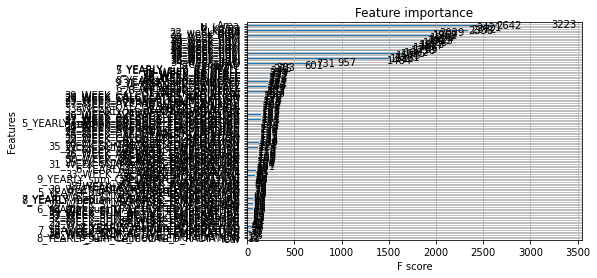

In [52]:
xgb_fea_imp=pd.DataFrame(list(best_xgb_model.get_booster().get_fscore().items()),
columns=['feature','importance']).sort_values('importance', ascending=False)
print('',xgb_fea_imp)


from xgboost import plot_importance
plot_importance(best_xgb_model, )

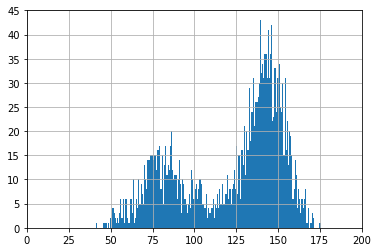

In [53]:
_hist_pred= plt.hist(predictions, bins=200)
plt.xlim(0, 200)
plt.ylim(0, 45)
plt.grid(True)

In [54]:
def weighted_cluster_averange():
    full_predict_table = _test_f.loc[:,["Field","Area"]]
    full_predict_table["Yield"] =predictions
    full_predict_table["NumField"] =1

    full_predict_table["a(i)*y(i)"]=full_predict_table["Yield"]*full_predict_table["Area"]
    full_predict_table=full_predict_table.groupby("Field").sum()
    full_predict_table["FINISH_ANSWER"]=full_predict_table["a(i)*y(i)"]/full_predict_table["NumField"]
    result = pd.merge(full_predict_table, _test_f.loc[:,["Field","Cluster"]], on="Field")
    return result

<AxesSubplot:xlabel='Cluster', ylabel='Yield'>

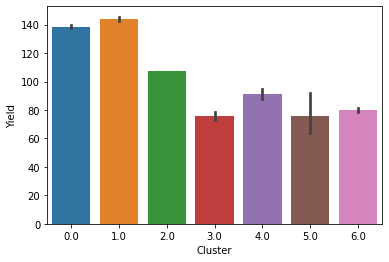

In [55]:
sns.barplot(x="Cluster", y= "Yield",data=weighted_cluster_averange())

In [56]:
r=weighted_cluster_averange()

In [57]:
r

,Field,Area,Yield,NumField,a(i)*y(i),FINISH_ANSWER,Cluster
0,0.0,67.223,115.125504,1,7739.081724,7739.081724,4.0
1,1.0,94.296,83.024094,1,7828.839933,7828.839933,4.0
2,2.0,101.126,95.292030,1,9636.501860,9636.501860,4.0
3,3.0,99.641,86.310318,1,8600.046395,8600.046395,4.0
4,4.0,103.779,75.495689,1,7834.867149,7834.867149,4.0
5,5.0,137.360,85.111641,1,11690.934998,11690.934998,4.0
6,6.0,103.089,85.352135,1,8798.866215,8798.866215,4.0
7,7.0,98.034,86.468491,1,8476.852008,8476.852008,4.0
8,8.0,43.813,104.120827,1,4561.845781,4561.845781,4.0
9,9.0,36.781,86.114510,1,3167.377777,3167.377777,4.0


In [58]:
import numpy as np
import scipy.stats


def interval_for_cluster(numCluster,confidence=0.95):
    data=r[r["Cluster"]==numCluster].loc[:,"Yield"]
    
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [59]:
interval_for_cluster(6)

(80.14209, 78.76206562300918, 81.52211406449082)

In [60]:
interval_for_cluster(5)

(76.03848, 59.811137564134924, 92.26582776789633)

In [61]:
interval_for_cluster(4)

(91.22337, 87.98492713032473, 94.46181969584714)

In [62]:
interval_for_cluster(3)

(75.910484, 72.8570204282985, 78.96394819963119)

In [64]:
interval_for_cluster(1)

(143.82199, 142.1456070870503, 145.49837484654344)

In [65]:
interval_for_cluster(0)

(138.67949, 137.77332395791962, 139.58565431356476)

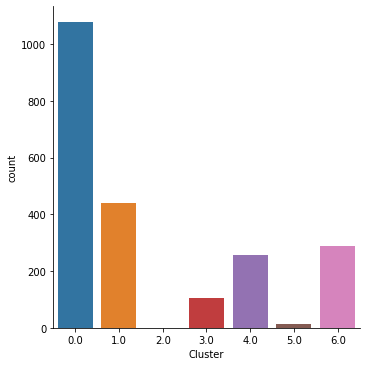

In [66]:
sns.catplot(x="Cluster", kind="count", data=r)